# 1. INTRODUCTION

### Dataset summary

### Research Questions

# 2. LOAD DATA & IMPORT LIBRARIES

In [2]:
#Importing libraries
from zipfile import ZipFile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [3]:
data_zip = ZipFile("C://Users//beltr//Documents//Data Analysis//Porftolio//Datasets//Kaggle Zip//Student_habits.zip")

In [4]:
data_zip.filelist

[<ZipInfo filename='student_habits_performance.csv' compress_type=deflate file_size=73663 compress_size=19314>]

In [5]:
data = data_zip.open('student_habits_performance.csv')

In [6]:
df = pd.read_csv(data)

# 3. DATA OVERVIEW

In [7]:
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [8]:
df.tail()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7
999,S1999,19,Female,4.3,2.9,1.9,No,89.4,7.1,Good,2,Bachelor,Average,8,No,74.9


In [9]:
df.sample()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
380,S1380,24,Male,3.5,1.6,2.2,No,69.9,9.3,Good,0,Bachelor,Average,6,No,67.7


In [10]:
df.shape

(1000, 16)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [12]:
df.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


# 4. DATA CLEANING

In [13]:
df.isna().sum()

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

In [14]:
df[df['parental_education_level'].isna()]

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
10,S1010,19,Female,4.6,3.7,0.8,No,77.6,5.8,Fair,1,NaN,Good,3,No,63.3
33,S1033,18,Female,4.0,0.9,1.1,No,99.5,5.8,Poor,2,NaN,Average,5,No,70.7
47,S1047,23,Female,2.5,2.9,2.7,No,83.5,7.0,Good,4,NaN,Good,8,Yes,59.7
74,S1074,21,Female,2.3,1.0,0.4,No,100.0,6.4,Fair,6,NaN,Good,1,No,66.9
93,S1093,22,Male,4.1,2.5,3.0,No,85.1,5.8,Good,4,NaN,Good,5,No,70.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921,S1921,23,Female,4.4,2.7,1.0,No,79.8,6.1,Fair,6,NaN,Average,3,No,85.4
925,S1925,19,Other,1.7,2.9,1.6,Yes,97.3,8.7,Good,1,NaN,Good,7,No,53.6
939,S1939,18,Female,4.7,3.2,1.9,No,75.2,5.4,Good,3,NaN,Good,6,No,71.0
945,S1945,23,Male,6.0,2.9,2.1,Yes,98.9,6.4,Poor,0,NaN,Average,7,No,100.0


In [15]:
df['parental_education_level'] = df['parental_education_level'].fillna('Unknown')

In [16]:
df.duplicated().sum()

0

# 5. UNIVARIATE ANALYSIS

In [17]:
num_var = ['age', 'study_hours_per_day','social_media_hours', 'netflix_hours', 'attendance_percentage', 'sleep_hours',
           'exercise_frequency', 'mental_health_rating', 'exam_score']

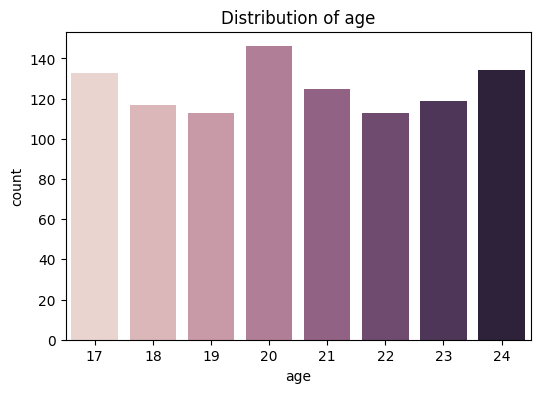

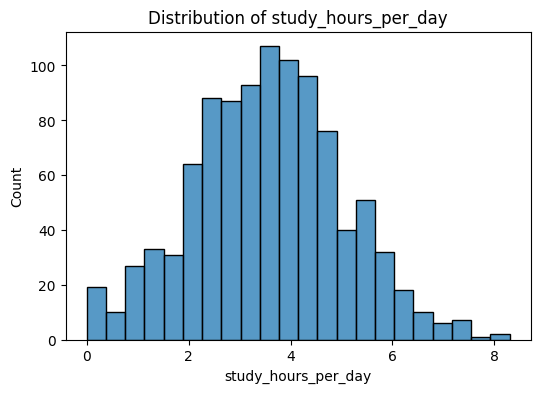

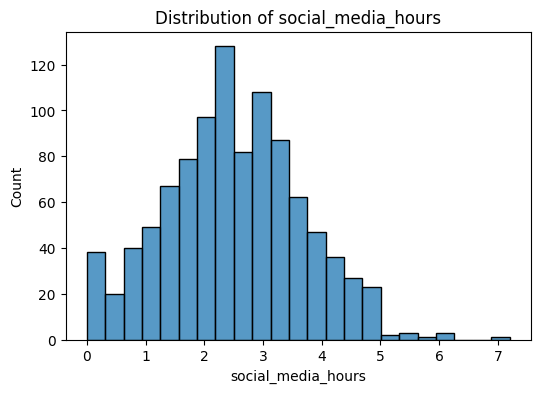

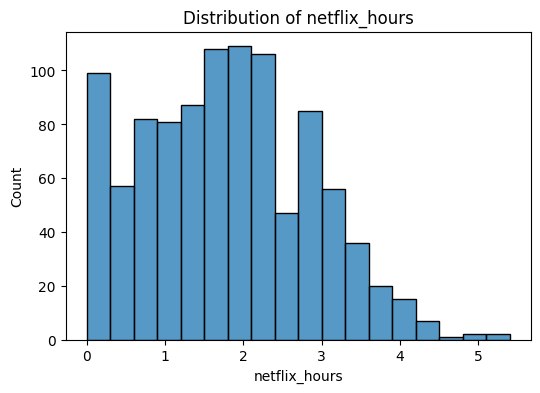

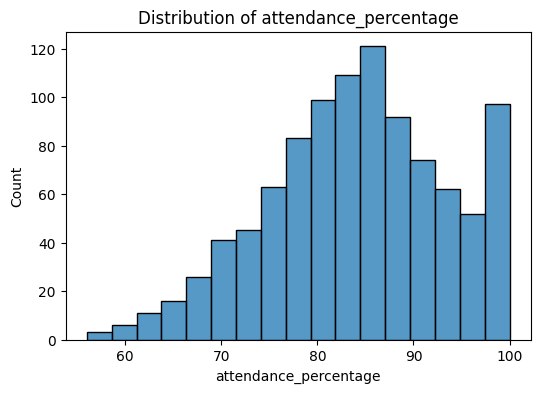

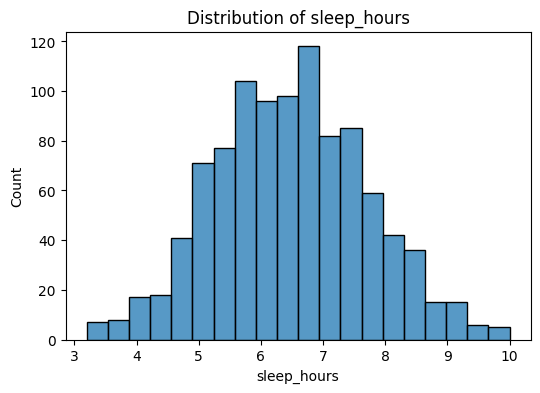

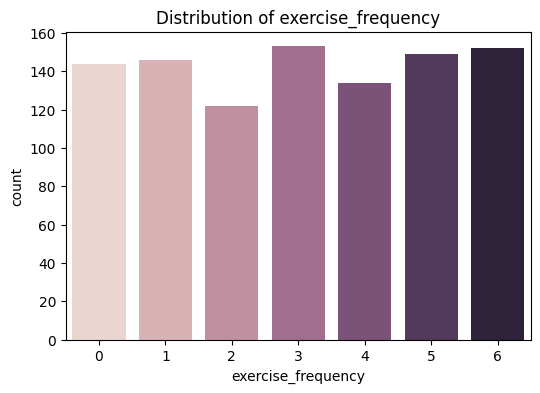

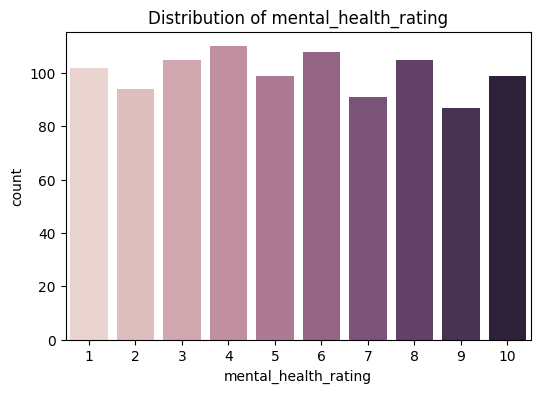

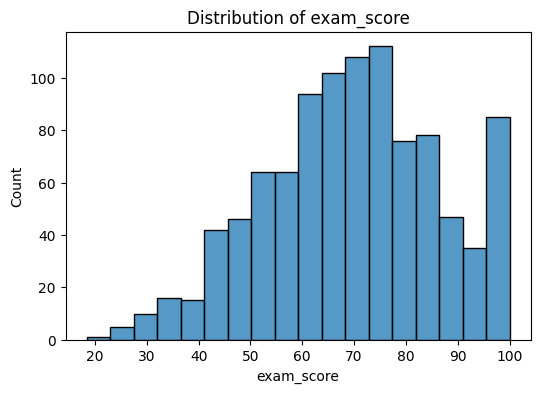

In [18]:
for var in num_var:
    if var in ['age','exercise_frequency', 'mental_health_rating']:
        plt.figure(figsize=(6,4))
        sns.countplot(data = df, x = var, hue = var, legend = False)
        plt.title(f'Distribution of {var}')
        plt.xlabel(f'{var}')
        plt.show()
    else:
        plt.figure(figsize=(6,4))
        sns.histplot(data = df, x = var)
        plt.title(f'Distribution of {var}')
        plt.xlabel(f'{var}')
        plt.show()

In [19]:
cat_var = ['gender', 'part_time_job', 'diet_quality', 'parental_education_level', 'internet_quality',
           'extracurricular_participation']

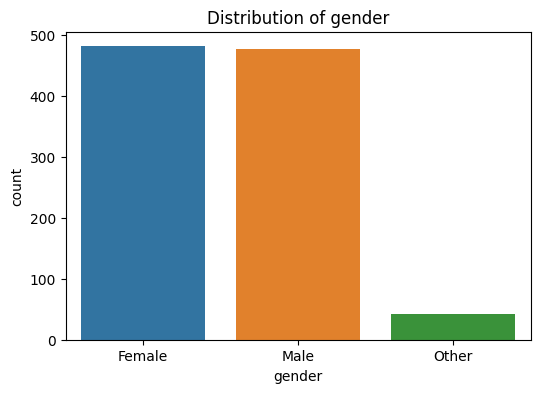

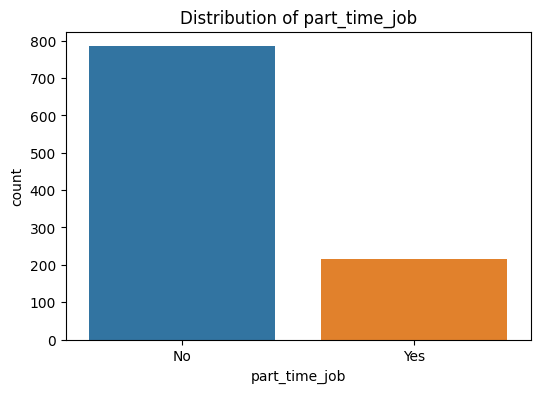

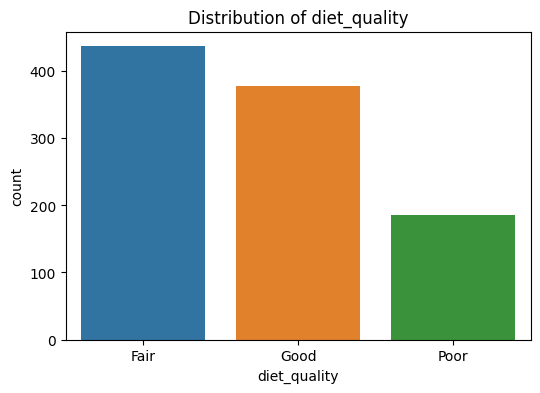

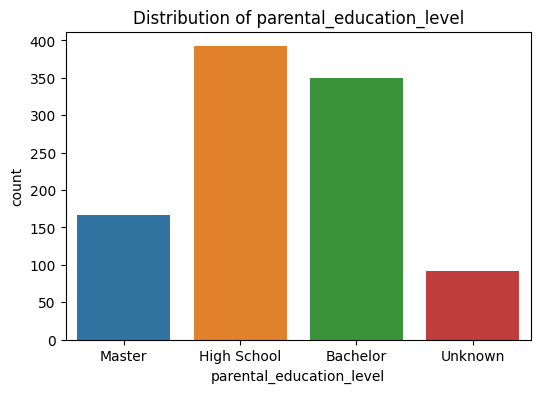

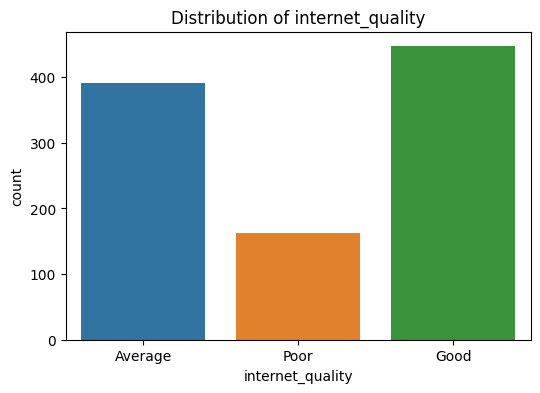

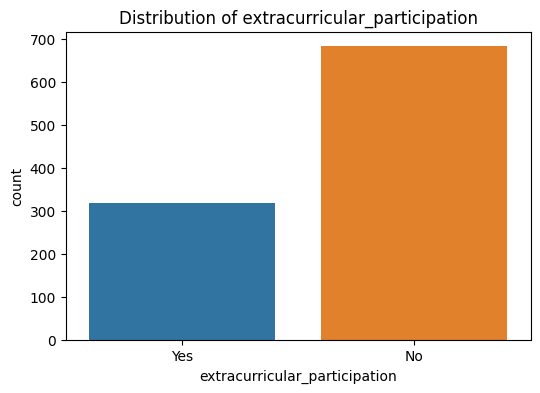

In [20]:
for var in cat_var:
    plt.figure(figsize=(6,4))
    sns.countplot(data = df, x = var, hue = var, legend = False)
    plt.title(f'Distribution of {var}')
    plt.xlabel(f'{var}')
    plt.show()

# 6. Exploratory Questions and Analysis


### Does sleep duration affect exam scores?

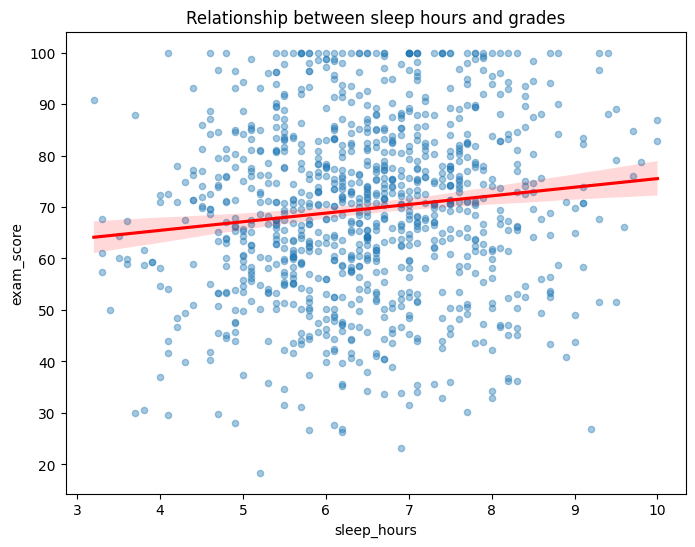

In [21]:
plt.figure(figsize=(8,6))
sns.regplot(
    data = df,
    x = 'sleep_hours',
    y = 'exam_score',
    line_kws={'color':'red'},
    scatter_kws={"alpha": 0.4, "s": 20},   
)
plt.title('Relationship between sleep hours and grades')
plt.show()

In [22]:
formula = 'exam_score ~ sleep_hours'

In [23]:
model = smf.ols(formula= formula, data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             exam_score   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     15.00
Date:                Tue, 20 May 2025   Prob (F-statistic):           0.000115
Time:                        20:33:57   Log-Likelihood:                -4237.6
No. Observations:                1000   AIC:                             8479.
Df Residuals:                     998   BIC:                             8489.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      58.7595      2.849     20.623      0.000      53.168      64.351
sleep_hours     1.6757      0.433      3.873      0.000       0.827       2.525
==============================================================================
Omnibus:                       14.185   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               11.262
Skew:                          -0.173   Prob(JB):                      0.00358
Kurtosis:                       2.612   Cond. No.                         36.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Is there a relationship between social media usage and mental health?

In [33]:
df["social_media_group"] = pd.cut(
    df["social_media_hours"],
    bins=[-0.1, 1, 3, 5, 8],
    labels=["Low", "Moderate", "High", "Very High"]
)

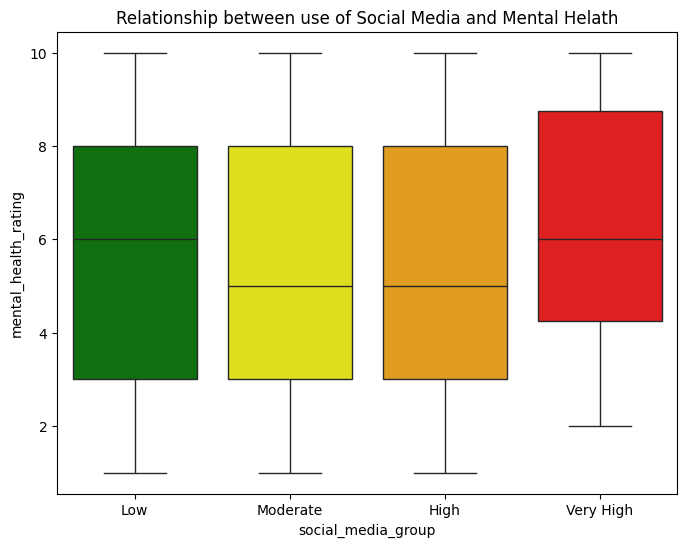

In [37]:
plt.figure(figsize=(8,6))
sns.boxplot(
    data=df, 
    x='social_media_group', 
    y='mental_health_rating',
    hue = 'social_media_group',
    palette = ['green', 'yellow', 'orange','red']
)
plt.title('Relationship between use of Social Media and Mental Helath')
plt.show()


In [38]:
formula = 'mental_health_rating ~ C(social_media_group)'

In [40]:
model = smf.ols(formula=formula, data = df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(social_media_group),7.947673,3.0,0.32607,0.806522
Residual,8092.208327,996.0,NaN,NaN


### Do study hours per day predict academic performance?


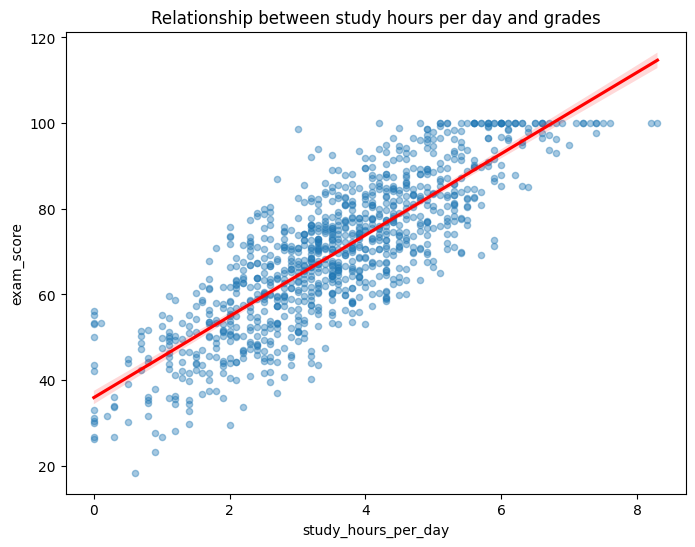

In [25]:
plt.figure(figsize=(8,6))
sns.regplot(
    data = df,
    x = 'study_hours_per_day',
    y = 'exam_score',
    line_kws={'color':'red'},
    scatter_kws={"alpha": 0.4, "s": 20},   
)
plt.title('Relationship between study hours per day and grades')
plt.show()

In [26]:
formula = 'exam_score ~ study_hours_per_day'

In [27]:
model = smf.ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             exam_score   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     2134.
Date:                Tue, 20 May 2025   Prob (F-statistic):          4.60e-250
Time:                        20:33:57   Log-Likelihood:                -3673.3
No. Observations:                1000   AIC:                             7351.
Df Residuals:                     998   BIC:                             7360.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              35.9102      0.789     45.496      0.000      34.361      37.459
study_hours_per_day     9.4903      0.205     46.191      0.000       9.087       9.893
==============================================================================
Omnibus:                        3.233   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.199   Jarque-Bera (JB):                2.727
Skew:                          -0.003   Prob(JB):                        0.256
Kurtosis:                       2.744   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Is there a relationship between exercise frequency and mental health rating among students?

In [42]:
df['exercise_freq_group'] = pd.cut(df['exercise_frequency'], bins =[-1,1,3,5,7], labels=[' 0-1 days per week',
                                                                                         '2-3 days per week',
                                                                                         '4-5 days per week',
                                                                                         '6+ days per week'])

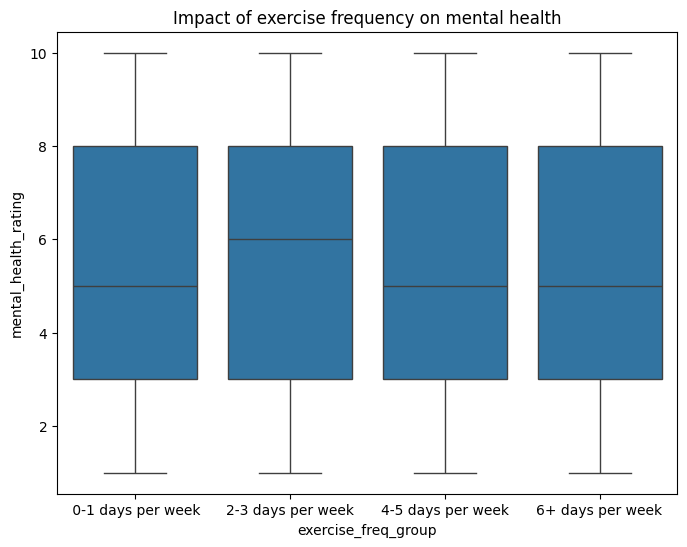

In [43]:
plt.figure(figsize=(8,6))
sns.boxplot(
    data=df,
    x='exercise_freq_group',
    y='mental_health_rating'
)
plt.title('Impact of exercise frequency on mental health')
plt.show()

In [44]:
formula = 'mental_health_rating ~ C(exercise_freq_group)'

In [46]:
model = smf.ols(formula=formula, data=df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(exercise_freq_group),23.630155,3.0,0.97136,0.405507
Residual,8076.525845,996.0,NaN,NaN


### Is Netflix usage negatively associated with exam results?


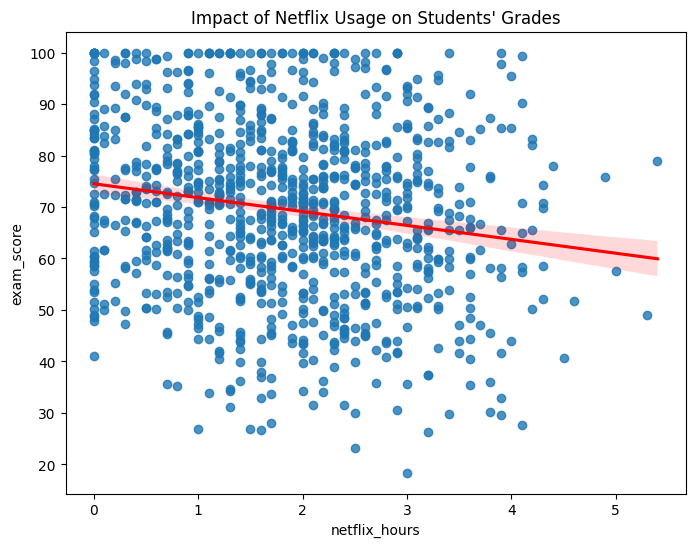

In [50]:
plt.figure(figsize=(8,6))
sns.regplot(
    data=df,
    x='netflix_hours',
    y='exam_score',
    line_kws={'color':'red'}
)
plt.title("Impact of Netflix Usage on Students' Grades")

plt.show()

In [49]:
model = smf.ols(formula ='exam_score ~ netflix_hours', data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             exam_score   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     30.34
Date:                Tue, 20 May 2025   Prob (F-statistic):           4.60e-08
Time:                        21:56:16   Log-Likelihood:                -4230.1
No. Observations:                1000   AIC:                             8464.
Df Residuals:                     998   BIC:                             8474.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        74.5118      1.035     71.977      0.000      72.480      76.543
netflix_hours    -2.6984      0.490     -5.509      0.000      -3.660      -1.737
==============================================================================
Omnibus:                       15.383   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.811
Skew:                          -0.133   Prob(JB):                      0.00449
Kurtosis:                       2.565   Cond. No.                         4.88
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 7. KEY INSIGHTS

# 8. CONCLUSIONS